In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [10]:
df = pd.read_csv('djinni_data.csv')
df

,title,company,experience,description,posted_date,views,applications
0,Tech Lead (Python),1touch,5,Tech Lead (Python)<br>We are looking for a Tec...,11:40 26.02.2024,242,37
1,LLM Specialist with Python Knowledge,AIceberg,1,Position Description:<br>We are looking for an...,11:36 26.02.2024,210,60
2,Senior Python Developer,Unikoom,5,Tripmaker - поєднання штучного та природного і...,11:32 26.02.2024,140,38
3,Senior Python Engineer IRC213794,GlobalLogic,5,<b>Description:</b><br><br>Our client is one o...,10:50 26.02.2024,11,4
4,Senior Python Backend Engineer,ZERO,5,Today we are looking for a talented <b>Senior ...,09:38 26.02.2024,338,96
...,...,...,...,...,...,...,...
214,Senior Python Full-Stack Developer,Synergetica,5,Our customer is developing a complex system fo...,10:13 05.03.2024,231,22
215,Senior Back End Python Developer,Fluvius,5,<b>Required Skills:</b><br><br>- Proficient in...,17:37 07.03.2024,31,3
216,Software Engineer,SPS Commerce,3,What We Expect of You:<br>We are adding to our...,17:27 07.03.2024,255,23
217,Senior Software Engineer,SPS Commerce,5,What We Expect of You:<br>We are adding to our...,17:23 07.03.2024,125,9


In [11]:
df["posted_date"] = pd.to_datetime(df["posted_date"], format="%H:%M %d.%m.%Y")
df["experience"] = pd.to_numeric(df["experience"], errors='coerce').fillna(0).astype(int)
df

,title,company,experience,description,posted_date,views,applications
0,Tech Lead (Python),1touch,5,Tech Lead (Python)<br>We are looking for a Tec...,2024-02-26 11:40:00,242,37
1,LLM Specialist with Python Knowledge,AIceberg,1,Position Description:<br>We are looking for an...,2024-02-26 11:36:00,210,60
2,Senior Python Developer,Unikoom,5,Tripmaker - поєднання штучного та природного і...,2024-02-26 11:32:00,140,38
3,Senior Python Engineer IRC213794,GlobalLogic,5,<b>Description:</b><br><br>Our client is one o...,2024-02-26 10:50:00,11,4
4,Senior Python Backend Engineer,ZERO,5,Today we are looking for a talented <b>Senior ...,2024-02-26 09:38:00,338,96
...,...,...,...,...,...,...,...
214,Senior Python Full-Stack Developer,Synergetica,5,Our customer is developing a complex system fo...,2024-03-05 10:13:00,231,22
215,Senior Back End Python Developer,Fluvius,5,<b>Required Skills:</b><br><br>- Proficient in...,2024-03-07 17:37:00,31,3
216,Software Engineer,SPS Commerce,3,What We Expect of You:<br>We are adding to our...,2024-03-07 17:27:00,255,23
217,Senior Software Engineer,SPS Commerce,5,What We Expect of You:<br>We are adding to our...,2024-03-07 17:23:00,125,9


<function matplotlib.pyplot.show(close=None, block=None)>

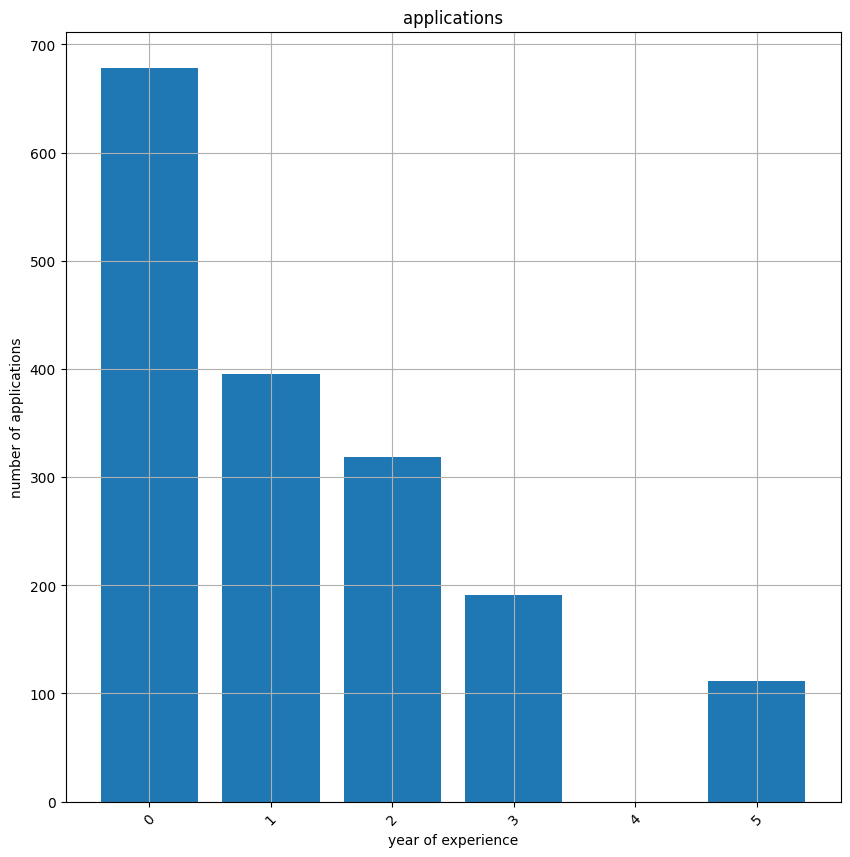

In [16]:
fig,ax = plt.subplots(figsize=(10, 10))
ax.bar(df.experience, df.applications)
ax.set_title("applications")
ax.set_xlabel("year of experience")
ax.set_ylabel("number of applications")

ax.grid()
plt.show

In [ ]:
df

In [17]:
from djinni_analisys.config import technologies
def extract_technologies(description):
    return [word for word in technologies if word in description]

df["technology"] = df["description"].apply(extract_technologies)
df

,title,company,experience,description,posted_date,views,applications,technology
0,Tech Lead (Python),1touch,5,Tech Lead (Python)<br>We are looking for a Tec...,2024-02-26 11:40:00,242,37,"[Python, SQL, NoSQL, FastAPI, Flask, Kubernete..."
1,LLM Specialist with Python Knowledge,AIceberg,1,Position Description:<br>We are looking for an...,2024-02-26 11:36:00,210,60,"[Python, FastAPI, Docker, API, MongoDB]"
2,Senior Python Developer,Unikoom,5,Tripmaker - поєднання штучного та природного і...,2024-02-26 11:32:00,140,38,"[Python, SQL, FastAPI, Django, Flask, Docker, ..."
3,Senior Python Engineer IRC213794,GlobalLogic,5,<b>Description:</b><br><br>Our client is one o...,2024-02-26 10:50:00,11,4,"[Python, Git, SQL, Django, Flask, Docker, Kube..."
4,Senior Python Backend Engineer,ZERO,5,Today we are looking for a talented <b>Senior ...,2024-02-26 09:38:00,338,96,"[Python, JavaScript, Git, FastAPI, Django, Fla..."
...,...,...,...,...,...,...,...,...
214,Senior Python Full-Stack Developer,Synergetica,5,Our customer is developing a complex system fo...,2024-03-05 10:13:00,231,22,"[Python, SQL, REST API, REST, API, MongoDB, Re..."
215,Senior Back End Python Developer,Fluvius,5,<b>Required Skills:</b><br><br>- Proficient in...,2024-03-07 17:37:00,31,3,"[Python, JavaScript, API]"
216,Software Engineer,SPS Commerce,3,What We Expect of You:<br>We are adding to our...,2024-03-07 17:27:00,255,23,"[Python, JavaScript, Docker, Kubernetes, API, ..."
217,Senior Software Engineer,SPS Commerce,5,What We Expect of You:<br>We are adding to our...,2024-03-07 17:23:00,125,9,"[Python, JavaScript, Docker, Kubernetes, API, ..."


In [18]:
techno_types = df["technology"].explode()

In [19]:
techno_types

0          Python
0             SQL
0           NoSQL
0         FastAPI
0           Flask
          ...    
217         React
218        Python
218           Git
218           SQL
218    Kubernetes
Name: technology, Length: 1438, dtype: object

In [20]:
df = df.join(pd.crosstab(techno_types.index, techno_types))
df

,title,company,experience,description,posted_date,views,applications,technology,API,AWS,...,SSL,Solidity,Tableau,TypeScript,XML,Yaml,algorithms,asyncio,fullstack,linux
0,Tech Lead (Python),1touch,5,Tech Lead (Python)<br>We are looking for a Tec...,2024-02-26 11:40:00,242,37,"[Python, SQL, NoSQL, FastAPI, Flask, Kubernete...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LLM Specialist with Python Knowledge,AIceberg,1,Position Description:<br>We are looking for an...,2024-02-26 11:36:00,210,60,"[Python, FastAPI, Docker, API, MongoDB]",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Senior Python Developer,Unikoom,5,Tripmaker - поєднання штучного та природного і...,2024-02-26 11:32:00,140,38,"[Python, SQL, FastAPI, Django, Flask, Docker, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senior Python Engineer IRC213794,GlobalLogic,5,<b>Description:</b><br><br>Our client is one o...,2024-02-26 10:50:00,11,4,"[Python, Git, SQL, Django, Flask, Docker, Kube...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senior Python Backend Engineer,ZERO,5,Today we are looking for a talented <b>Senior ...,2024-02-26 09:38:00,338,96,"[Python, JavaScript, Git, FastAPI, Django, Fla...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Senior Python Full-Stack Developer,Synergetica,5,Our customer is developing a complex system fo...,2024-03-05 10:13:00,231,22,"[Python, SQL, REST API, REST, API, MongoDB, Re...",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,Senior Back End Python Developer,Fluvius,5,<b>Required Skills:</b><br><br>- Proficient in...,2024-03-07 17:37:00,31,3,"[Python, JavaScript, API]",1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,Software Engineer,SPS Commerce,3,What We Expect of You:<br>We are adding to our...,2024-03-07 17:27:00,255,23,"[Python, JavaScript, Docker, Kubernetes, API, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,Senior Software Engineer,SPS Commerce,5,What We Expect of You:<br>We are adding to our...,2024-03-07 17:23:00,125,9,"[Python, JavaScript, Docker, Kubernetes, API, ...",1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
columns = techno_types.drop_duplicates().dropna()
columns

0              Python
0                 SQL
0               NoSQL
0             FastAPI
0               Flask
0          Kubernetes
0                 API
0             MongoDB
0                 OOP
0              Celery
0               Redis
1              Docker
2              Django
2                 AWS
3                 Git
3                REST
4          JavaScript
4        Data Science
4          algorithms
4                  JS
5            REST API
5                 DRF
7               React
9                 CSS
9                HTML
13            GraphQL
22         SQLAlchemy
34           Solidity
41             Pandas
41              NumPy
42         Matplotlib
46            asyncio
53                XML
54                SSL
59               HTTP
67          fullstack
76            Pyramid
77              linux
90                 GO
121              Rust
121        TypeScript
148              MQTT
169           Tableau
187    Data Analytics
195              Json
195       

In [22]:
techno_df = df.loc[:,columns]
techno_df

,Python,SQL,NoSQL,FastAPI,Flask,Kubernetes,API,MongoDB,OOP,Celery,...,Pyramid,linux,GO,Rust,TypeScript,MQTT,Tableau,Data Analytics,Json,Yaml
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
sums = techno_df.sum(axis=0)
sum_df = pd.DataFrame({"sum_value": sums})
sum_df.sort_values(by="sum_value", ascending=False, inplace=True)
sum_df.head(10)

,sum_value
Python,209.0
API,132.0
SQL,125.0
AWS,104.0
Docker,100.0
Django,82.0
Git,64.0
REST,63.0
Kubernetes,45.0
FastAPI,43.0


<function matplotlib.pyplot.show(close=None, block=None)>

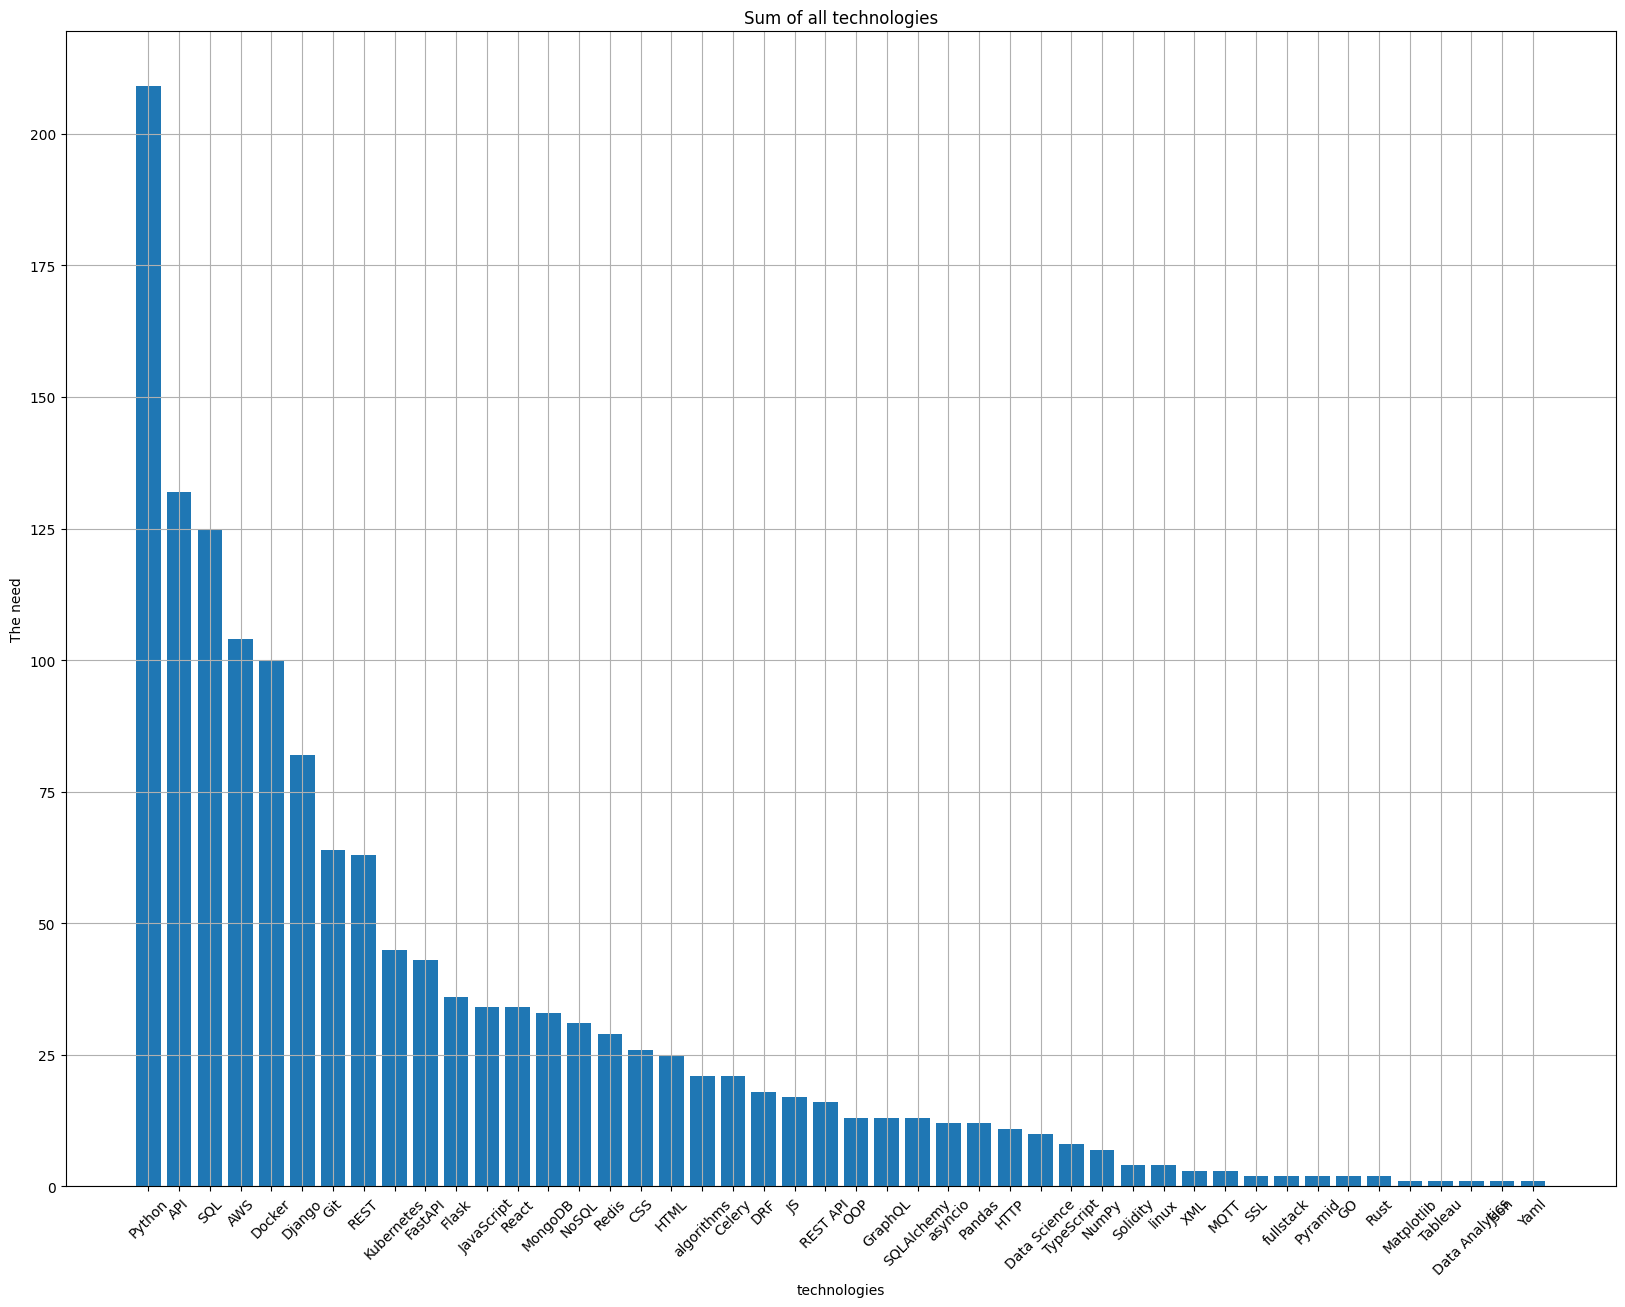

In [26]:
fig,ax = plt.subplots(figsize=(20, 15))
ax.bar(sum_df.index, sum_df.sum_value)
ax.set_title("Sum of all technologies")
ax.set_xlabel("technologies")
ax.set_ylabel("The need")
plt.xticks(rotation=45)
ax.grid()
plt.show